In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error

In [26]:
# load the dataset
original_dataset = pd.read_csv('raw_data/employee_attrition_data.csv')

In [27]:
df = original_dataset.copy()
df.head()

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [28]:
# overview of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee_ID            1000 non-null   int64  
 1   Age                    1000 non-null   int64  
 2   Gender                 1000 non-null   object 
 3   Department             1000 non-null   object 
 4   Job_Title              1000 non-null   object 
 5   Years_at_Company       1000 non-null   int64  
 6   Satisfaction_Level     1000 non-null   float64
 7   Average_Monthly_Hours  1000 non-null   int64  
 8   Promotion_Last_5Years  1000 non-null   int64  
 9   Salary                 1000 non-null   int64  
 10  Attrition              1000 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 86.1+ KB


In [29]:
df.describe()

,Employee_ID,Age,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,42.205000,5.605000,0.505995,199.493000,0.486000,64624.980000,0.495000
std,288.819436,10.016452,2.822223,0.289797,29.631908,0.500054,20262.984333,0.500225
min,0.000000,25.000000,1.000000,0.001376,150.000000,0.000000,30099.000000,0.000000
25%,249.750000,33.000000,3.000000,0.258866,173.000000,0.000000,47613.500000,0.000000
50%,499.500000,43.000000,6.000000,0.505675,201.000000,0.000000,64525.000000,0.000000
75%,749.250000,51.000000,8.000000,0.761135,225.000000,1.000000,81921.000000,1.000000
max,999.000000,59.000000,10.000000,0.999979,249.000000,1.000000,99991.000000,1.000000


In [30]:
df.isnull().sum()

Employee_ID              0
Age                      0
Gender                   0
Department               0
Job_Title                0
Years_at_Company         0
Satisfaction_Level       0
Average_Monthly_Hours    0
Promotion_Last_5Years    0
Salary                   0
Attrition                0
dtype: int64

##### No null values found.

In [31]:
df.duplicated().sum()

np.int64(0)

##### No duplicates found.

In [32]:
# drop the unnecessary cols:

df.drop(columns="Employee_ID", inplace=True)

<Axes: xlabel='Gender'>

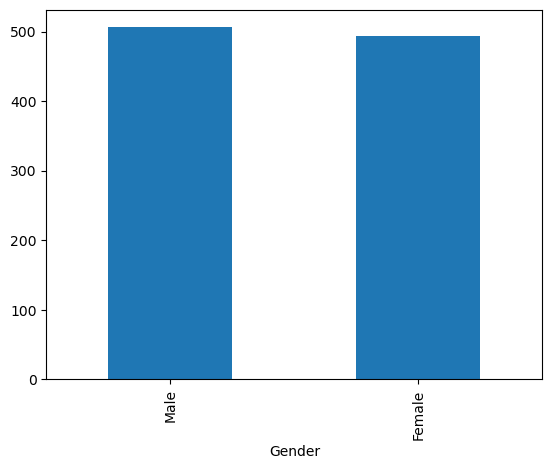

In [33]:
df['Gender'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Average salary by job titles')

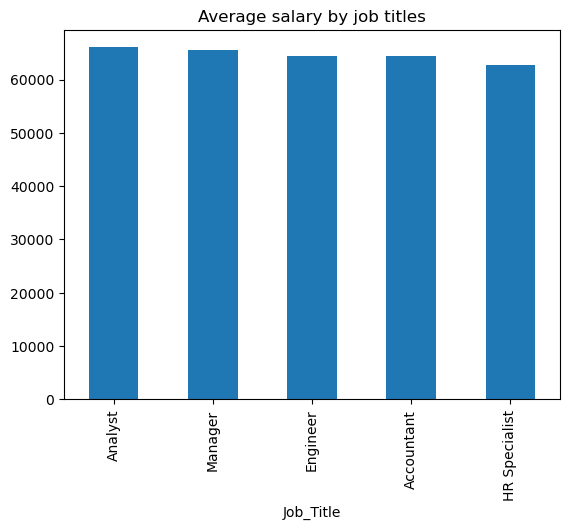

In [34]:
df.groupby('Job_Title')['Salary'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Average salary by job titles")

In [35]:
df.columns

Index(['Age', 'Gender', 'Department', 'Job_Title', 'Years_at_Company',
       'Satisfaction_Level', 'Average_Monthly_Hours', 'Promotion_Last_5Years',
       'Salary', 'Attrition'],
      dtype='object')

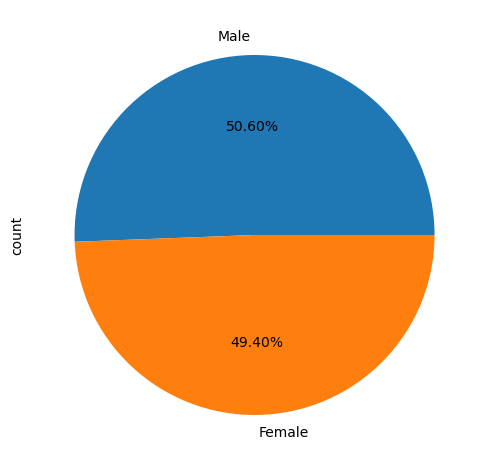

In [36]:
df['Gender'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.tight_layout()

In [37]:
# average salary by department, promotion

df.groupby(['Department', 'Promotion_Last_5Years'])['Salary'].mean()

Department   Promotion_Last_5Years
Engineering  0                        65541.063636
             1                        62424.127660
Finance      0                        63390.145299
             1                        62041.269663
HR           0                        63012.556701
             1                        65882.861702
Marketing    0                        65251.597826
             1                        66018.632653
Sales        0                        64295.846939
             1                        67838.756757
Name: Salary, dtype: float64

In [46]:
# dependent and independent variables
X = df[['Years_at_Company', 'Satisfaction_Level', 'Average_Monthly_Hours']]
y = df['Salary']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [47]:
# scale

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
import joblib
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']